Intermediate (Level 2) Task 3: Clustering (Unsupervised Learning)

Description: Implement K-Means clustering to group data points into clusters without labels (e.g., customer segmentation)

--- 1. Loading the Mall Customer Segmentation Dataset ---

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dty

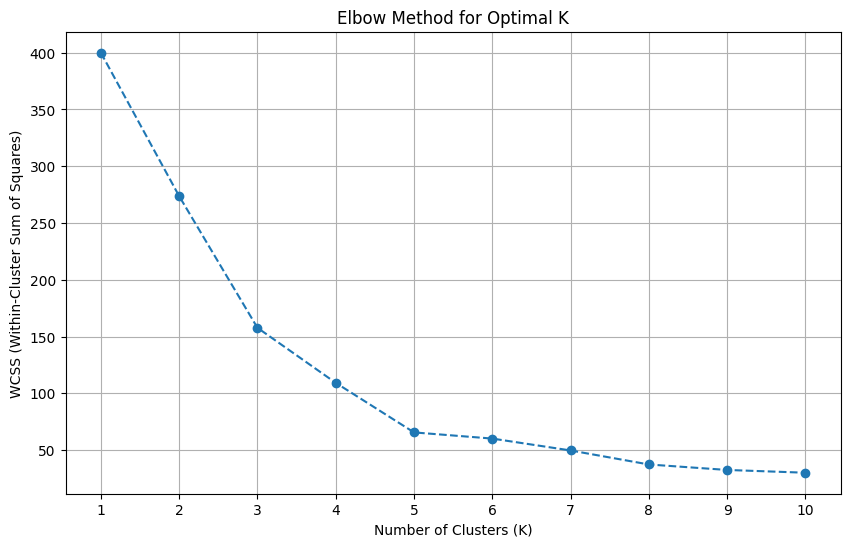

Look for the 'elbow' point in the graph above. This suggests a good value for K.
Silhouette Score for K=2: 0.3973
Silhouette Score for K=3: 0.4666
Silhouette Score for K=4: 0.4943
Silhouette Score for K=5: 0.5547
Silhouette Score for K=6: 0.5138
Silhouette Score for K=7: 0.5020
Silhouette Score for K=8: 0.4550
Silhouette Score for K=9: 0.4567
Silhouette Score for K=10: 0.4448


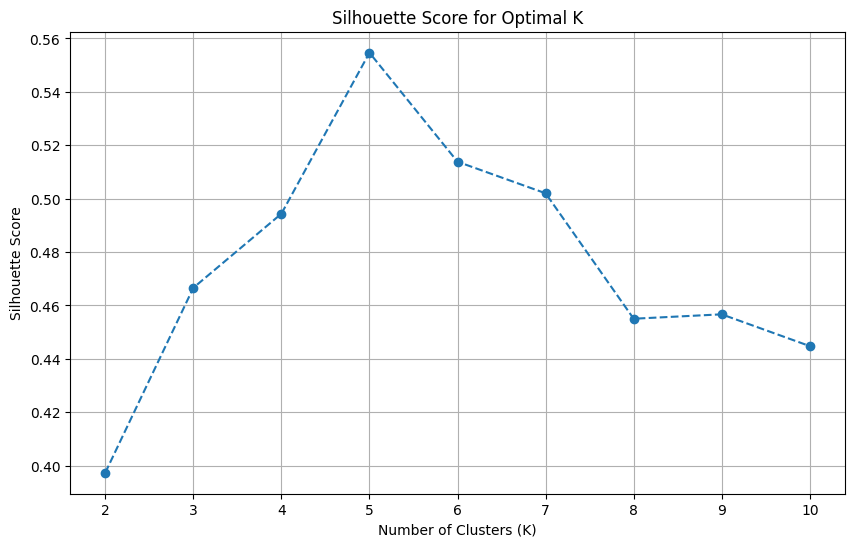

A higher silhouette score generally indicates better-defined clusters.

Selected Optimal K: 5

--- 4. Applying K-Means Clustering with K = 5 ---

First 5 rows with assigned clusters:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  

Number of data points per cluster:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

Scaled Cluster Centers:
   Annual Income (k$)  Spending Score (1-100)
0           -0.200913               -0.026456
1            0.991583                1.239503
2           -1.329545

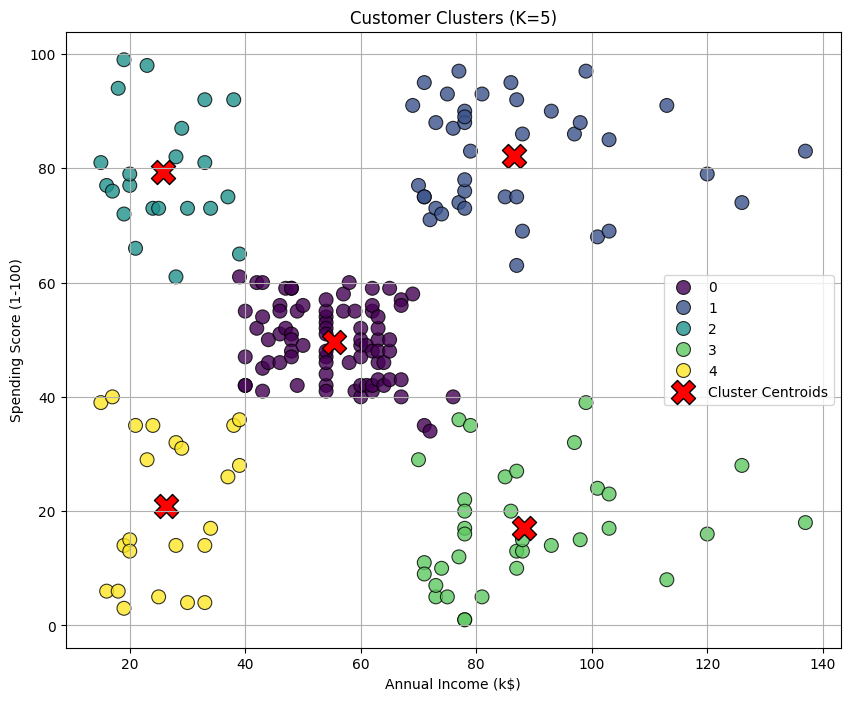


PCA/t-SNE visualization not strictly needed as only 2 features were used for clustering.

--- 6. Interpreting the Clustering Results ---

Cluster Characteristics (Mean of Numerical Features):
         Annual Income (k$)  Spending Score (1-100)        Age
Cluster                                                       
0                 55.296296               49.518519  42.716049
1                 86.538462               82.128205  32.692308
2                 25.727273               79.363636  25.272727
3                 88.200000               17.114286  41.114286
4                 26.304348               20.913043  45.217391

Cluster Characteristics (Distribution of Categorical Features):

--- Gender Distribution per Cluster ---
Gender     Female      Male
Cluster                    
0        0.592593  0.407407
1        0.538462  0.461538
2        0.590909  0.409091
3        0.457143  0.542857
4        0.608696  0.391304

--- Summary of Key Findings ---
Based on the cluster centers in

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings

# Suppress KMeans inertia warning
warnings.filterwarnings("ignore", category=FutureWarning)

# --- 1. Load the Dataset ---
print("--- 1. Loading the Mall Customer Segmentation Dataset ---")

# You can download this dataset from Kaggle:
# https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-dataset
# Save it as 'Mall_Customers.csv' in the same directory as your script.

csv_file_path = 'Mall_Customers.csv'

try:
    df = pd.read_csv(csv_file_path)
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
    print("\nDataset Description:")
    print(df.describe())
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
    print("Please download 'Mall_Customers.csv' from Kaggle (link above) and place it in the same directory.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")
    exit()

# --- 2. Data Preprocessing for Clustering ---
print("\n--- 2. Data Preprocessing for Clustering ---")

# We'll focus on 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering
# These are numerical and represent customer behavior traits.
# Gender is categorical and would need encoding, but we'll simplify for initial clustering.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("\nFeatures selected for clustering (X):")
print(X.head())

# Feature Scaling: K-Means is sensitive to the scale of features.
# StandardScaler makes sure all features contribute equally.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns) # Convert back to DataFrame for clarity

print("\nFirst 5 rows of scaled features (X_scaled_df):")
print(X_scaled_df.head())


# --- 3. Determine Optimal Number of Clusters (K) ---
print("\n--- 3. Determining Optimal Number of Clusters (K) ---")

# Using the Elbow Method
# We calculate the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters.
wcss = []
max_clusters = 11 # Test K from 1 to 10

for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # Inertia is the WCSS

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, max_clusters))
plt.grid(True)
plt.show()
print("Look for the 'elbow' point in the graph above. This suggests a good value for K.")

# Using Silhouette Score (More computationally intensive for many K values)
# We need at least 2 clusters for silhouette score
silhouette_scores = []
min_clusters_for_silhouette = 2

if X_scaled.shape[0] >= min_clusters_for_silhouette:
    for i in range(min_clusters_for_silhouette, max_clusters):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
        kmeans.fit(X_scaled)
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)
        print(f"Silhouette Score for K={i}: {score:.4f}")

    if silhouette_scores:
        plt.figure(figsize=(10, 6))
        plt.plot(range(min_clusters_for_silhouette, max_clusters), silhouette_scores, marker='o', linestyle='--')
        plt.title('Silhouette Score for Optimal K')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('Silhouette Score')
        plt.xticks(range(min_clusters_for_silhouette, max_clusters))
        plt.grid(True)
        plt.show()
        print("A higher silhouette score generally indicates better-defined clusters.")
    else:
        print("Not enough data points to calculate silhouette score for multiple clusters.")
else:
    print(f"Not enough samples ({X_scaled.shape[0]}) to calculate silhouette score for K >= {min_clusters_for_silhouette}.")

# Based on visual inspection of the elbow plot (often K=5 for this dataset)
# or the highest silhouette score, choose your optimal K.
optimal_k = 5 # Example choice, adjust based on your plot analysis

print(f"\nSelected Optimal K: {optimal_k}")

# --- 4. Apply K-Means Clustering with Optimal K ---
print(f"\n--- 4. Applying K-Means Clustering with K = {optimal_k} ---")

kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')
df['Cluster'] = kmeans_final.fit_predict(X_scaled) # Assign cluster labels back to original DataFrame

print("\nFirst 5 rows with assigned clusters:")
print(df.head())
print(f"\nNumber of data points per cluster:\n{df['Cluster'].value_counts().sort_index()}")

# Add cluster centers to the scaled data for visualization
cluster_centers_scaled = pd.DataFrame(kmeans_final.cluster_centers_, columns=X.columns)
print("\nScaled Cluster Centers:")
print(cluster_centers_scaled)

# Inverse transform cluster centers to original scale for interpretation
cluster_centers_original_scale = scaler.inverse_transform(kmeans_final.cluster_centers_)
cluster_centers_original_scale_df = pd.DataFrame(cluster_centers_original_scale, columns=X.columns)
print("\nCluster Centers in Original Scale for Interpretation:")
print(cluster_centers_original_scale_df)


# --- 5. Visualize the Clusters ---
print("\n--- 5. Visualizing the Clusters ---")

# Since we only used 2 features, we can plot directly without PCA/t-SNE.
# If you had many features, PCA would be used first.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df,
                palette='viridis', s=100, alpha=0.8, edgecolor='k')
plt.scatter(cluster_centers_original_scale_df['Annual Income (k$)'],
            cluster_centers_original_scale_df['Spending Score (1-100)'],
            s=300, c='red', marker='X', label='Cluster Centroids', edgecolor='black')
plt.title(f'Customer Clusters (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# If you had more than 2 features initially for clustering, you'd use PCA or t-SNE for visualization
# Example using PCA for visualization (even though not strictly needed here for 2 features)
if X.shape[1] > 2: # Only apply PCA if there are more than 2 features
    print("\nApplying PCA for 2D visualization (if more than 2 features were used for clustering)...")
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_scaled)
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Cluster'] = df['Cluster'] # Add cluster labels

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df,
                    palette='viridis', s=100, alpha=0.8, edgecolor='k')
    plt.title(f'Customer Clusters (K={optimal_k}) - PCA Reduced')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nPCA/t-SNE visualization not strictly needed as only 2 features were used for clustering.")


# --- 6. Interpret the Clustering Results ---
print("\n--- 6. Interpreting the Clustering Results ---")

# Separate numerical and categorical columns for interpretation
numerical_cols = X.columns.tolist() + ['Age'] # X contains 'Annual Income (k$)' and 'Spending Score (1-100)'
categorical_cols = ['Gender'] # Assuming 'Gender' is the only categorical one you want to include

# Calculate mean for numerical features
cluster_summary_numerical = df.groupby('Cluster')[numerical_cols].mean()
print("\nCluster Characteristics (Mean of Numerical Features):")
print(cluster_summary_numerical)

# Calculate value counts (distribution) for categorical features
print("\nCluster Characteristics (Distribution of Categorical Features):")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n--- {col} Distribution per Cluster ---")
        print(df.groupby('Cluster')[col].value_counts(normalize=True).unstack(fill_value=0))
    else:
        print(f"Warning: Column '{col}' not found in DataFrame for categorical analysis.")


print("\n--- Summary of Key Findings ---")
print("Based on the cluster centers in original scale and cluster characteristics, we can interpret the segments:")

for i, row in cluster_centers_original_scale_df.iterrows():
    print(f"\nCluster {i}:")
    print(f"  Average Annual Income: ${row['Annual Income (k$)']:.2f}K")
    print(f"  Average Spending Score: {row['Spending Score (1-100)']:.2f}")

    # Add more interpretation based on other features if desired, e.g., age, gender distribution
    if 'Age' in cluster_summary_numerical.columns:
        print(f"  Average Age: {cluster_summary_numerical.loc[i, 'Age']:.1f} years")

    # Use the separate categorical analysis for Gender
    if 'Gender' in df.columns:
        gender_dist = df.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack(fill_value=0)
        if i in gender_dist.index:
            male_percent = gender_dist.loc[i, 'Male'] * 100 if 'Male' in gender_dist.columns else 0
            female_percent = gender_dist.loc[i, 'Female'] * 100 if 'Female' in gender_dist.columns else 0
            print(f"  Gender Mix: {male_percent:.1f}% Male, {female_percent:.1f}% Female")

    # Example interpretations (you'd refine these based on your specific results)
    if row['Annual Income (k$)'] < 40 and row['Spending Score (1-100)'] > 60:
        print("  Interpretation: Low Income, High Spending ('Impulsive Buyers') - likely young, fashion-conscious.")
    elif row['Annual Income (k$)'] > 70 and row['Spending Score (1-100)'] > 70:
        print("  Interpretation: High Income, High Spending ('Target Customers') - affluent, active shoppers.")
    elif row['Annual Income (k$)'] > 70 and row['Spending Score (1-100)'] < 40:
        print("  Interpretation: High Income, Low Spending ('Careful Spenders') - wealthy but frugal.")
    elif row['Annual Income (k$)'] < 40 and row['Spending Score (1-100)'] < 40:
        print("  Interpretation: Low Income, Low Spending ('Frugal Customers') - budget-conscious.")
    else:
        print("  Interpretation: Mid-range Income and Spending ('Average Customers') - typical shoppers.")

print("\nThese interpretations help in understanding distinct customer segments for targeted strategies.")